In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
train = pd.read_csv('/content/train.csv', on_bad_lines='skip')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
test = pd.read_csv('/content/test.csv', on_bad_lines='skip')
test.head()

,Comb,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004P00128942,1000004,P00128942,M,46-50,7,B,2,0,1,11.0,NaN
1,1000009P00113442,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010P00288442,1000010,P00288442,F,36-45,1,B,4+,0,5,14.0,NaN
3,1000010P00145342,1000010,P00145342,F,36-45,1,B,4+,0,4,9.0,NaN
4,1000011P00053842,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
train.shape

(550068, 12)

In [8]:
test.shape

(233599, 12)

In [9]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
m=train['Gender'].value_counts()

In [14]:
age=train['Age'].value_counts()

In [16]:
fig=px.bar(age,y=age,x=age.index,color=age.index,template='ggplot2')
fig.update_layout(
    xaxis_title= 'Age',
    yaxis_title="Count",
    legend_title='Age',
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()


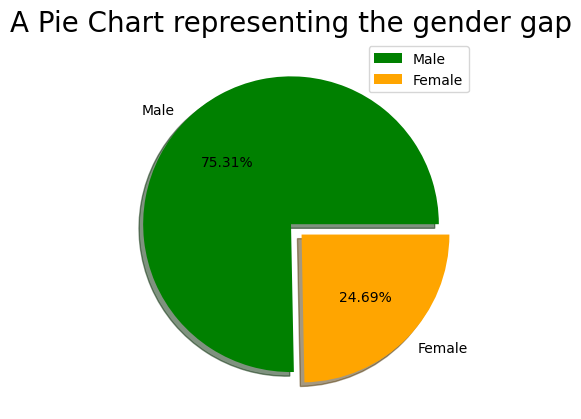

In [17]:
labels = ['Male', 'Female']
colors = ['Green', 'Orange']
explode = [0, 0.1]

plt.pie(m, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

In [18]:
train[['Product_Category_1','Product_Category_2','Product_Category_3']].groupby(train['Gender']).mean()

,Product_Category_1,Product_Category_2,Product_Category_3
Gender,,,
F,5.717714,10.009166,12.453556
M,5.301512,9.788729,12.730699


In [19]:
train[['Product_Category_1','Product_Category_2','Product_Category_3']].groupby(train['User_ID']).count()

,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,,,
1000001,35,21,14
1000002,77,54,26
1000003,29,23,13
1000004,14,12,9
1000005,106,58,16
...,...,...,...
1006036,514,319,110
1006037,122,74,33
1006038,12,9,3


In [20]:
train.groupby('User_ID').Product_ID.count()

,Product_ID
User_ID,
1000001,35
1000002,77
1000003,29
1000004,14
1000005,106
...,...
1006036,514
1006037,122
1006038,12


In [21]:
train['Product_ID'].value_counts()[:5]

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB



Numeric columns: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


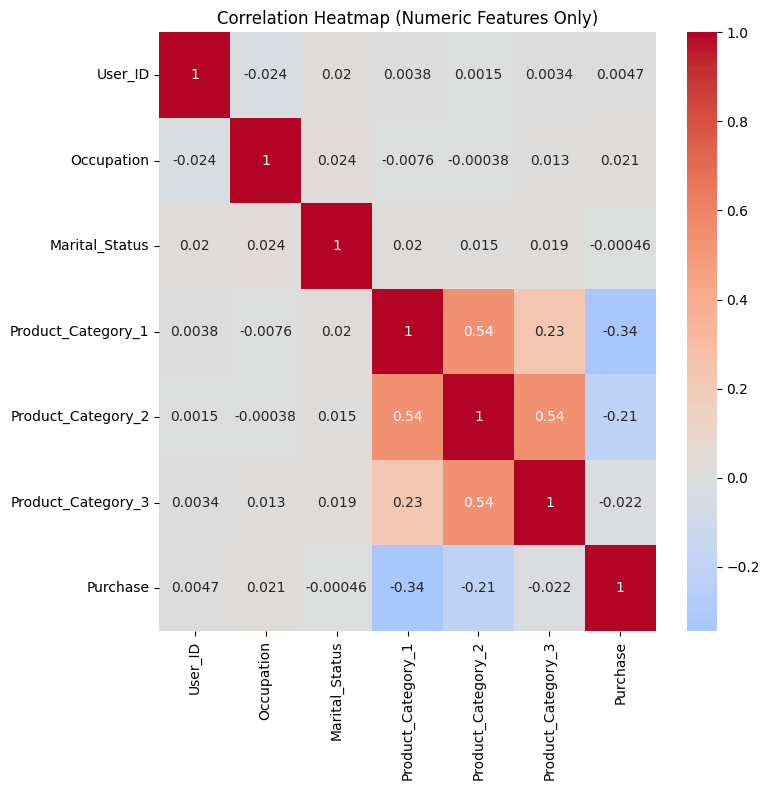

In [25]:
numeric_cols = train.select_dtypes(include=[np.number]).columns
print(f"\nNumeric columns: {list(numeric_cols)}")
fig, ax = plt.subplots(figsize=(8, 8))
correlation_matrix = train[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, ax=ax, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.tight_layout()
plt.show()

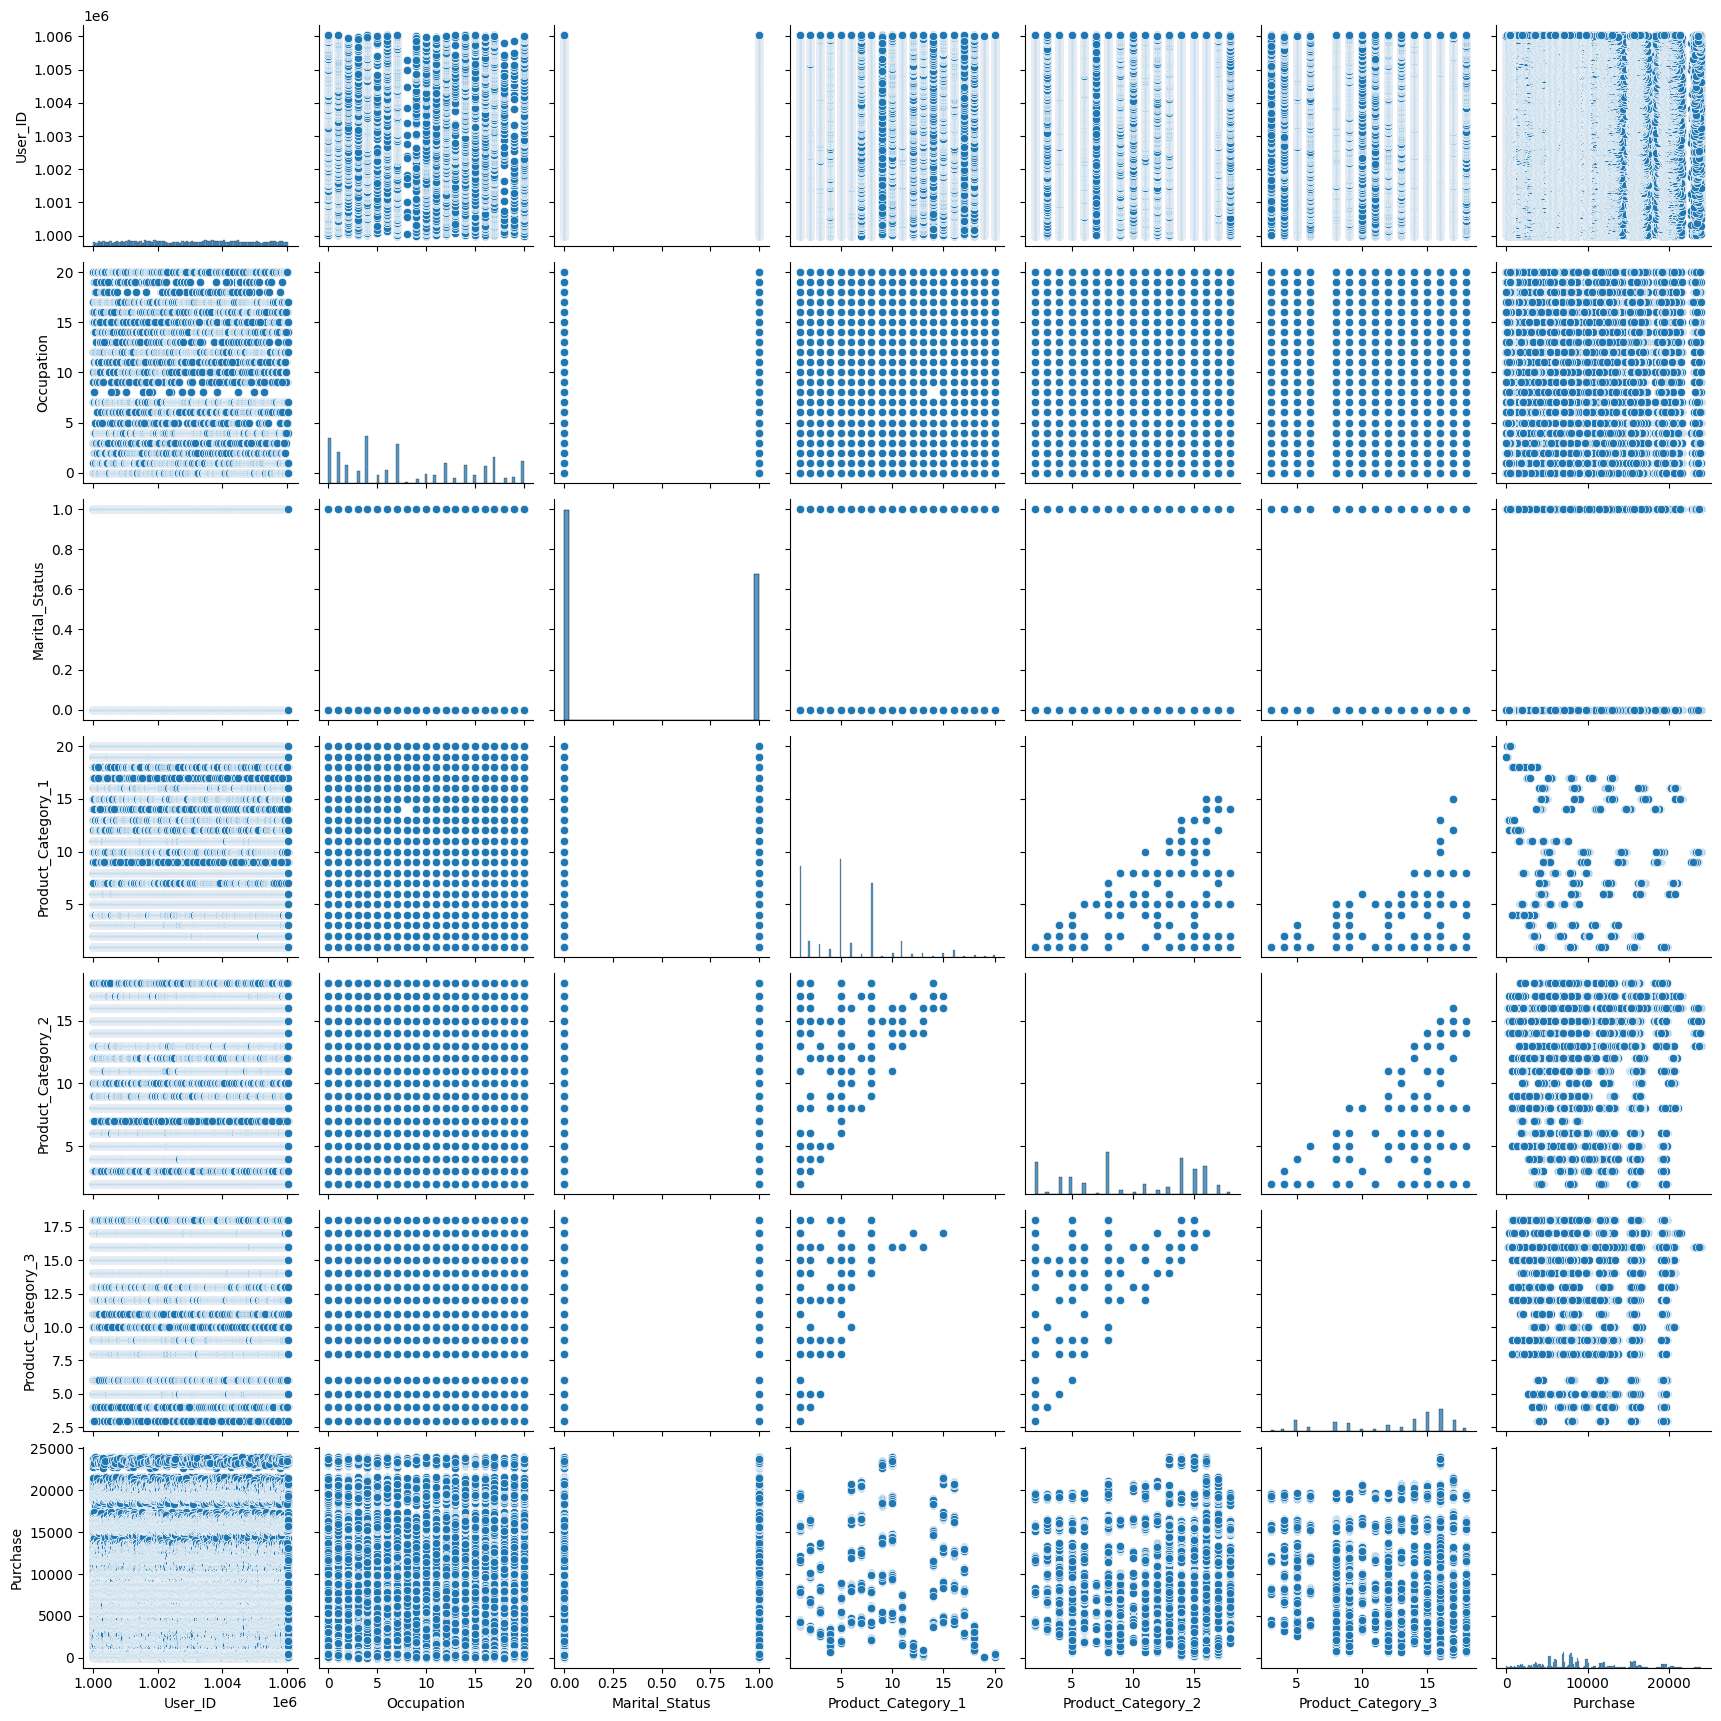

In [26]:
sns.pairplot(train)
plt.show()

In [27]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


/tmp/ipython-input-29430559.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


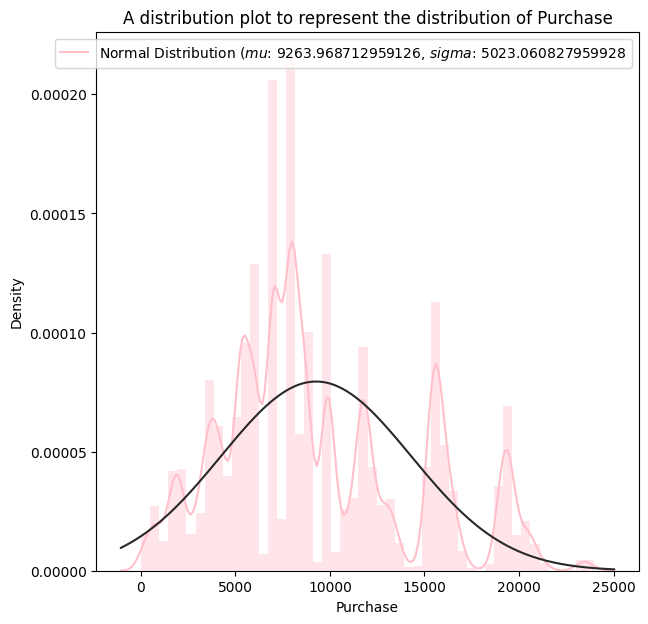

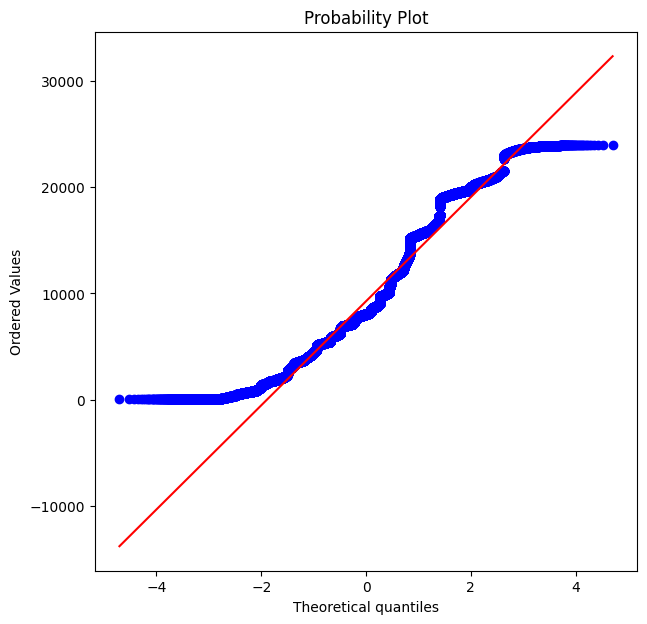

In [28]:
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(train['Purchase'], color = 'pink', fit = norm)

# fitting the target variable to the normal curve
mu, sigma = norm.fit(train['Purchase'])
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot
stats.probplot(train['Purchase'], plot = plt)
plt.show()

<Axes: ylabel='Purchase'>

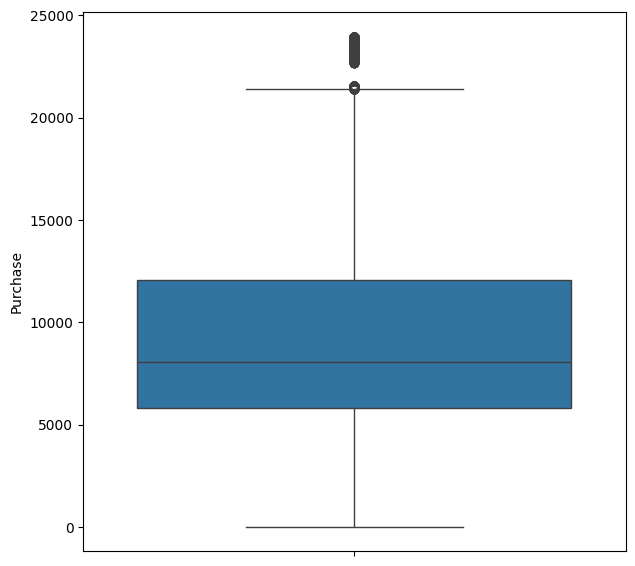

In [29]:
sns.boxplot(train['Purchase'])

<Axes: xlabel='Gender', ylabel='count'>

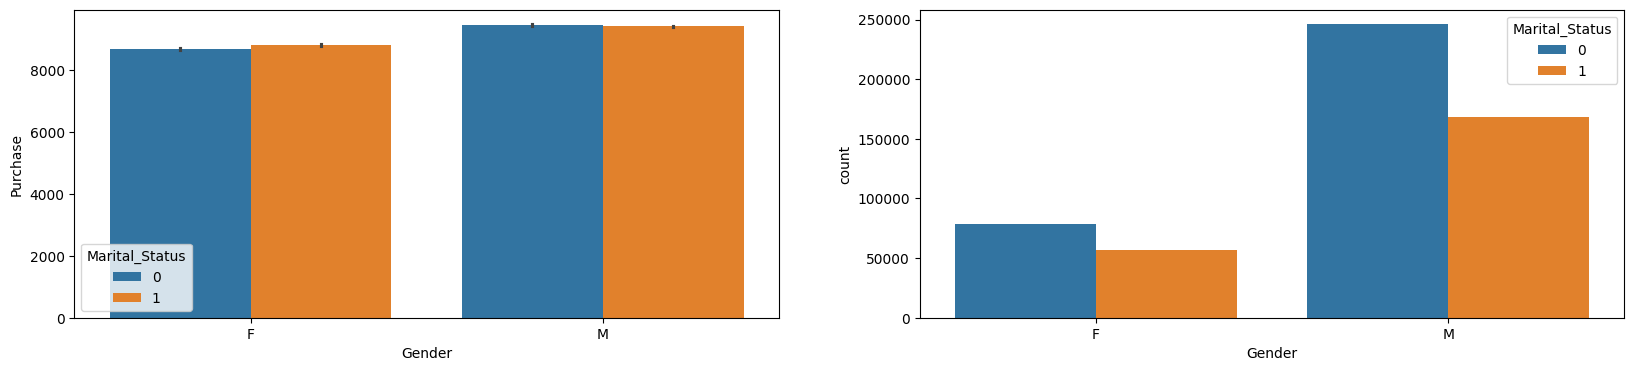

In [30]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Gender",y="Purchase",hue="Marital_Status",estimator=np.mean,data=train,ax=ax[0])
sns.countplot(x="Gender",hue="Marital_Status",data=train,ax=ax[1])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

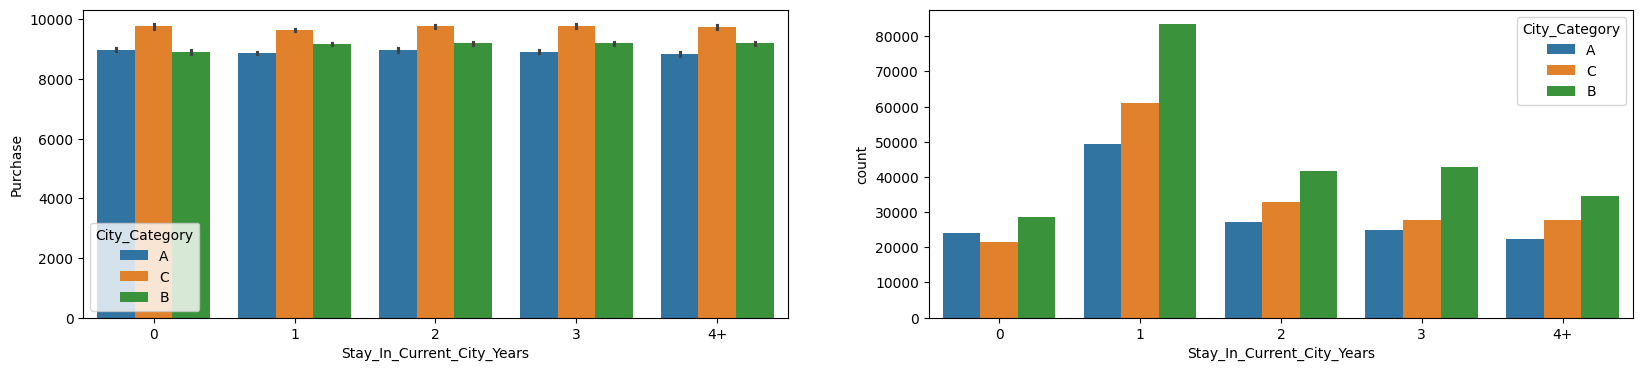

In [31]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",hue="City_Category",order=["0","1","2","3","4+"],estimator=np.mean,data=train,ax=ax[0])
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",order=["0","1","2","3","4+"],data=train,ax=ax[1])

<Axes: xlabel='Occupation', ylabel='Purchase'>

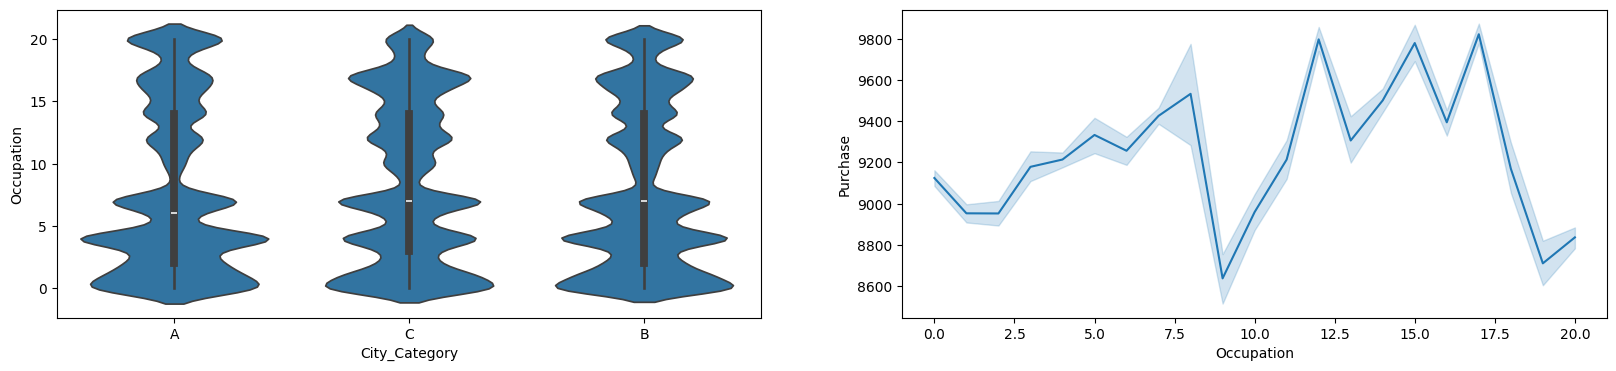

In [32]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="City_Category",y="Occupation",data=train,ax=ax[0])
sns.lineplot(x="Occupation",y="Purchase",data=train,ax=ax[1])

<Axes: xlabel='Age', ylabel='Occupation'>

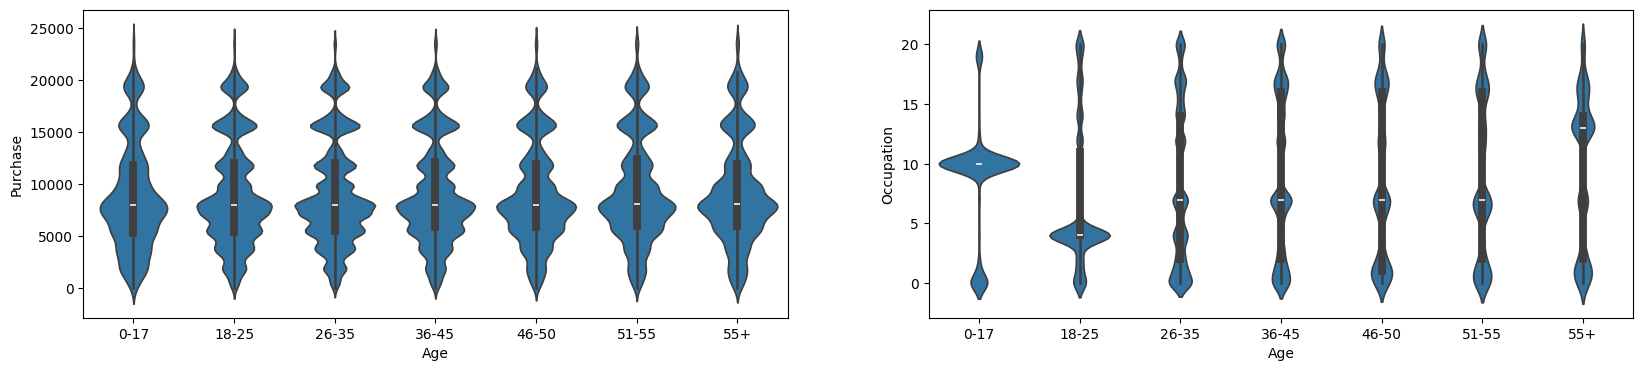

In [33]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="Age",y="Purchase",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=train,ax=ax[0])
sns.violinplot(x="Age",y="Occupation",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=train,ax=ax[1])

In [34]:
test_copy=test.copy()

In [35]:
train['Product_Category_2'].fillna(train['Product_Category_2'].mean(),inplace=True)

/tmp/ipython-input-2105823658.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [36]:
test['Product_Category_2'].fillna(test['Product_Category_2'].mean(),inplace=True)

/tmp/ipython-input-1320215835.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [37]:
train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0],inplace=True)

/tmp/ipython-input-1925129310.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [38]:
test['Product_Category_3'].fillna(test['Product_Category_3'].mode()[0],inplace=True)

/tmp/ipython-input-2657439881.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [39]:
train['Product_Category_1']=np.sqrt(train['Product_Category_1'])


In [40]:
test['Product_Category_1']=np.sqrt(test['Product_Category_1'])

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
train['Product_ID']=le.fit_transform(train['Product_ID'])

In [44]:
columns=[]
for col in train.columns:
    if train[col].dtypes=='object':
        columns.append(col)

In [45]:
train_encode=pd.get_dummies(train,columns=columns,dtype=np.uint8)

In [46]:
test_encode=pd.get_dummies(test,columns=columns,dtype=np.uint8)

In [47]:
test_encode['Product_ID']=le.fit_transform(test_encode['Product_ID'])

In [48]:
y=train_encode['Purchase']

In [49]:
X=train_encode.drop(['Purchase'],axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler

# Store column names and indices
col = X.columns
ind = X.index
colum = test_encode.columns
index = test_encode.index

# Initialize and fit scaler ONLY on training data
scl = StandardScaler()
X_scaled = scl.fit_transform(X)  # Fit and transform training data
X = pd.DataFrame(X_scaled, columns=col, index=ind)

# Transform test data using the already fitted scaler
# First ensure test_encode contains only numeric data
test_numeric = test_encode.select_dtypes(include=[np.number])
test_scaled = scl.transform(test_numeric)  # Only transform, don't fit
test_encode = pd.DataFrame(test_scaled, columns=test_numeric.columns, index=index)

In [52]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
def metrics(true,pred):
    return sqrt(mean_squared_error(true,pred))

In [53]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]

In [54]:
xgb=XGBRegressor(random_state=1,n_estimators= 61, max_depth=11)
xgb.fit(xtr,ytr)
pre=xgb.predict(xvl)
print(metrics(yvl,pre))
result=xgb.predict(test_encode)
test_copy['Purchase']=result
submission = test_copy[['Purchase','User_ID','Product_ID']]
submission.to_csv('sub_xgb.csv', index=False)

2574.1508308566536
